In [5]:
import sys
import numpy as np

sys.path.insert(0, "/usr/src/code/src")

from pre_process_code.imputation import *
from plots import *
from stats import *
from cd_diagram import *
from aeon.datasets import load_from_tsfile
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    roc_auc_score,
    balanced_accuracy_score,
)

%matplotlib inline


In [6]:
base_path = pathlib.Path("/usr/src/code/data/outputs")
datasets = [
    "ERing",
    "Epilepsy",
    "Heartbeat",
    "UWaveGestureLibrary",
    "ArticularyWordRecognition",
    "EthanolConcentration",
    "Libras",
    "AsphaltPavementTypeCoordinates",
    "FingerMovements",
    "Handwriting",
]

models = [
    "TSClassifierRNN",
    "TSAREncoderDecoder",
    "RidgeClassifier",
    "CanonicalIntervalForest",
    "HIVECOTEV2",
    "ResNetClassifier",
]

pmisses = [0, 20, 40, 60, 70, 80, 90]

results, model_mean, pmiss_result = calculate_metrics(
    f1_score,
    base_path,
    datasets,
    models,
    pmisses,
    func_params={"average": "macro"},
)

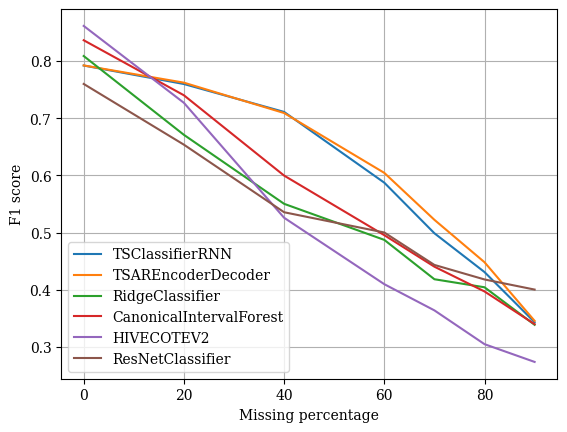

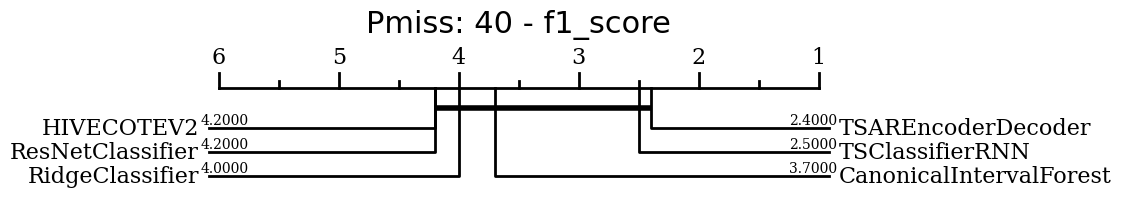

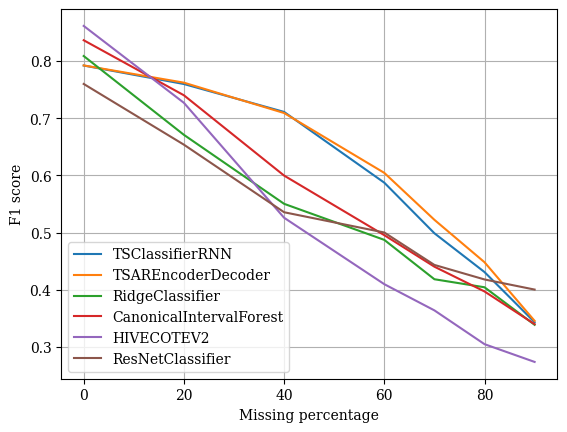

In [7]:
plot_metric(model_mean, metric="F1 score")

['TSClassifierRNN' 'TSAREncoderDecoder' 'RidgeClassifier'
 'CanonicalIntervalForest' 'HIVECOTEV2' 'ResNetClassifier']
the null hypothesis over the entire classifiers cannot be rejected
CanonicalIntervalForest    1.0
HIVECOTEV2                 0.0
ResNetClassifier           1.0
RidgeClassifier            2.0
TSAREncoderDecoder         3.0
TSClassifierRNN            3.0
dtype: float64
HIVECOTEV2                 4.2
ResNetClassifier           4.2
RidgeClassifier            4.0
CanonicalIntervalForest    3.7
TSClassifierRNN            2.5
TSAREncoderDecoder         2.4
dtype: float64
('ResNetClassifier', 'TSClassifierRNN', 0.01953125, False)
('RidgeClassifier', 'TSClassifierRNN', 0.01953125, False)
('RidgeClassifier', 'TSAREncoderDecoder', 0.037109375, False)
('CanonicalIntervalForest', 'TSAREncoderDecoder', 0.064453125, False)
('CanonicalIntervalForest', 'TSClassifierRNN', 0.064453125, False)
('HIVECOTEV2', 'TSClassifierRNN', 0.064453125, False)
('ResNetClassifier', 'TSAREncoderDecoder', 

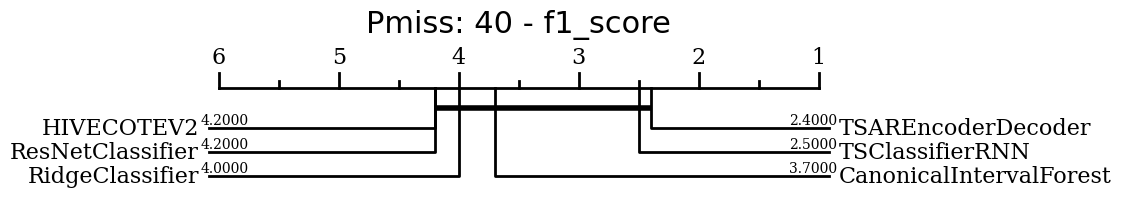

In [13]:
base_path = pathlib.Path("/usr/src/code/data/outputs")
pmiss = 40
metric_name = "f1_score"

datasets = [
    "ERing",
    "Epilepsy",
    "Heartbeat",
    "UWaveGestureLibrary",
    "ArticularyWordRecognition",
    "EthanolConcentration",
    "Libras",
    "AsphaltPavementTypeCoordinates",
    "FingerMovements",
    "Handwriting",
]

models = [
    "TSClassifierRNN",
    "TSAREncoderDecoder",
    "RidgeClassifier",
    "CanonicalIntervalForest",
    "HIVECOTEV2",
    "ResNetClassifier",
]

df = gather_metric_cd(
    f1_score,
    "f1_score",
    base_path,
    datasets,
    models,
    pmiss,
    func_params={"average": "macro"},
)
draw_cd_diagram(metric_name, df, title=f"Pmiss: {pmiss} - {metric_name}", labels=True)